# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents

In [2]:
# Run this code:
salaries = pd.read_csv('../Current_Employee_Names__Salaries__and_Position_Titles.csv')

Examine the `salaries` dataset using the `head` function below.

In [3]:
# Your code here:
salaries.head()

Name                              Job Titles  \
0    AARON,  JEFFERY M                                SERGEANT   
1      AARON,  KARINA   POLICE OFFICER (ASSIGNED AS DETECTIVE)   
2  AARON,  KIMBERLEI R                CHIEF CONTRACT EXPEDITER   
3  ABAD JR,  VICENTE M                       CIVIL ENGINEER IV   
4    ABASCAL,  REECE E             TRAFFIC CONTROL AIDE-HOURLY   

         Department Full or Part-Time Salary or Hourly  Typical Hours  \
0            POLICE                 F           Salary            NaN   
1            POLICE                 F           Salary            NaN   
2  GENERAL SERVICES                 F           Salary            NaN   
3       WATER MGMNT                 F           Salary            NaN   
4              OEMC                 P           Hourly           20.0   

   Annual Salary  Hourly Rate  
0       101442.0          NaN  
1        94122.0          NaN  
2       101592.0          NaN  
3       110064.0          NaN  
4            NaN        19.86

We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [4]:
# Your code here:
salaries.isnull().sum()

Name                     0
Job Titles               0
Department               0
Full or Part-Time        0
Salary or Hourly         0
Typical Hours        25161
Annual Salary         8022
Hourly Rate          25161
dtype: int64

Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

In [5]:
# Your code here:
salaries['Salary or Hourly'].value_counts()


Salary    25161
Hourly     8022
Name: Salary or Hourly, dtype: int64

What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

There are different departments in the city. List all departments and the count of employees in each department.

In [6]:
# Your code here:
salaries.pivot_table(index=['Department'], values=['Name'], aggfunc='count')


Name
Department                  
ADMIN HEARNG              39
ANIMAL CONTRL             81
AVIATION                1629
BOARD OF ELECTION        107
BOARD OF ETHICS            8
BUDGET & MGMT             46
BUILDINGS                269
BUSINESS AFFAIRS         171
CITY CLERK                84
CITY COUNCIL             411
COMMUNITY DEVELOPMENT    207
COPA                     116
CULTURAL AFFAIRS          65
DISABILITIES              28
DoIT                      99
FAMILY & SUPPORT         615
FINANCE                  560
FIRE                    4641
GENERAL SERVICES         980
HEALTH                   488
HUMAN RELATIONS           16
HUMAN RESOURCES           79
INSPECTOR GEN             87
LAW                      407
LICENSE APPL COMM          1
MAYOR'S OFFICE            85
OEMC                    2102
POLICE                 13414
POLICE BOARD               2
PROCUREMENT               92
PUBLIC LIBRARY          1015
STREETS & SAN           2198
TRANSPORTN              1140
TREASURER                 22
WATER MGMNT             1879

# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

In [7]:
# Your code here:
import numpy as np
from scipy.stats import ttest_1samp

# alternative hypotheses: one-sided (directional hypothesis)
hourly_rate = salaries[salaries['Salary or Hourly'] == 'Hourly']['Hourly Rate']
results = ttest_1samp(hourly_rate, 30)
print(results)

Ttest_1sampResult(statistic=20.6198057854942, pvalue=4.3230240486229894e-92)


In [8]:
results[1] < 0.05

True

We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. Test this one sided hypothesis using a 95% confidence interval.

Hint: A one tailed test has a p-value that is half of the two tailed p-value. If our hypothesis is greater than, then to reject, the test statistic must also be positive.

In [9]:
# Your code here:
police = salaries[(salaries['Department']=='POLICE')&(salaries['Salary or Hourly']=='Salary')]
police_salary = police['Annual Salary']
police_mean = police['Annual Salary'].mean()

ttest_1samp(police_salary, 86000)


Ttest_1sampResult(statistic=3.081997005712994, pvalue=0.0020603403550965137)

Using the `crosstab` function, find the department that has the most hourly workers. 

In [10]:
# Your code here:
hourly_workers = salaries[salaries['Salary or Hourly'] == 'Hourly']
pd.crosstab(index=hourly_workers.Department,columns = 'count').sort_values(by=['count'], ascending = False)

col_0                  count
Department                  
STREETS & SAN           1862
WATER MGMNT             1513
OEMC                    1273
AVIATION                1082
GENERAL SERVICES         765
TRANSPORTN               725
PUBLIC LIBRARY           299
FAMILY & SUPPORT         287
CITY COUNCIL              64
FINANCE                   44
LAW                       40
ANIMAL CONTRL             19
POLICE                    10
MAYOR'S OFFICE             8
CULTURAL AFFAIRS           7
BUSINESS AFFAIRS           7
HUMAN RESOURCES            4
COMMUNITY DEVELOPMENT      4
HEALTH                     3
FIRE                       2
PROCUREMENT                2
BUDGET & MGMT              2

The workers from the department with the most hourly workers have complained that their hourly wage is less than $35/hour. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

In [11]:
# Your code here:

hourly_rates = hourly_workers[hourly_workers['Department']=='STREETS & SAN']
hourly_rates = hourly_workers['Hourly Rate']
results2 = ttest_1samp(hourly_rates, 35)
print(results2)



Ttest_1sampResult(statistic=-16.352363851001144, pvalue=3.7636889298508017e-59)


In [12]:
results2[1] < 0.05

True

# Challenge 3 - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

In [13]:
from scipy.stats import sem
from scipy.stats import t

In [14]:
# Your code here:
hourlyrate_mean = hourly_workers['Hourly Rate'].mean()
freedom = len(hourly_workers) -1
error = sem(hourly_workers['Hourly Rate'])

t.interval(.95, freedom, loc=hourlyrate_mean , scale=error) 

(32.52345834488529, 33.05365708767727)

Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

In [15]:
# Your code here:

freedom2 = len(police_salary) -1
error2 = sem(police_salary)

t.interval(.95, freedom2, loc=police_mean , scale=error2) 

(86177.05631531784, 86795.77269094894)

# Challenge 4 - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

In [16]:
# Your code here:
from statsmodels.stats.proportion import proportions_ztest

In [17]:
hourly_workers = len(salaries[salaries['Salary or Hourly'] == 'Hourly'])
all_workers = len(salaries)

In [25]:
graphic = proportions_ztest(hourly_workers, all_workers, value=.25)
print(graphic)

(-3.5099964213703005, 0.0004481127249057967)


In [19]:
stat, pval = proportions_ztest(hourly_workers, all_workers, value=.25)


In [20]:
pval

0.0004481127249057967

In [21]:
hourly_workers/all_workers


0.24175029382515142

In [23]:
import matplotlib.pyplot as plt

In [26]:
import seaborn as sns

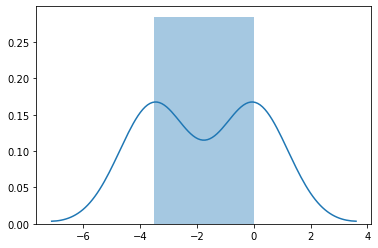

In [27]:
sns.distplot(graphic);